In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ---------- LOAD CLEANED DATA ----------
df = pd.read_csv("cleaned_healthcare_data.csv")

# Ensure dates are parsed
df['review_date'] = pd.to_datetime(df['review_date'], errors='coerce')

# ---------- BASIC OVERVIEW ----------
print("Dataset Overview:")
print(df.info())
print("\n First 5 rows:")
print(df.head())

print("\n Summary statistics for feedback score:")
print(df['patient_feedback_score'].describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   treatment_id_x          1000 non-null   object        
 1   patient_id              1000 non-null   object        
 2   doctor_id               1000 non-null   object        
 3   treatment_type          1000 non-null   object        
 4   treatment_cost          1000 non-null   float64       
 5   room_cost               1000 non-null   float64       
 6   treatment_date          1000 non-null   object        
 7   doctor_name             1000 non-null   object        
 8   specialty               1000 non-null   object        
 9   treatment_id_y          1000 non-null   object        
 10  patient_feedback_score  1000 non-null   float64       
 11  review_date             1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3

In [3]:
# 1. Average feedback score per doctor
avg_feedback_per_doctor = df.groupby(['doctor_id', 'doctor_name'])['patient_feedback_score'].mean().reset_index()
avg_feedback_per_doctor.rename(columns={'patient_feedback_score': 'avg_feedback_score'}, inplace=True)

In [4]:
# Top 5 doctors
top5 = avg_feedback_per_doctor.sort_values(by='avg_feedback_score', ascending=False).head(5)
print("\nTop 5 Doctors by Average Feedback:")
print(top5)


Top 5 Doctors by Average Feedback:
   doctor_id        doctor_name  avg_feedback_score
26      D027      Adam Williams            3.462500
10      D011         Amy Carter            3.450000
24      D025        Cody Murphy            3.415000
11      D012  Cynthia Rodriguez            3.395833
13      D014      Antonio Stone            3.388235


In [5]:
# Bottom 5 doctors
bottom5 = avg_feedback_per_doctor.sort_values(by='avg_feedback_score', ascending=True).head(5)
print("\nBottom 5 Doctors by Average Feedback:")
print(bottom5)


Bottom 5 Doctors by Average Feedback:
   doctor_id      doctor_name  avg_feedback_score
4       D005   Jennifer Smith            2.371429
32      D033  Jennifer Juarez            2.479167
5       D006     John Morales            2.495652
39      D040        Lisa Gray            2.580000
9       D010    Mariah Carter            2.590909


In [7]:
df['month'] = df['review_date'].dt.to_period('M')
monthly_trend = df.groupby('month')['patient_feedback_score'].mean().reset_index()


In [8]:
# 3. Monthly feedback trends
df['month'] = df['review_date'].dt.to_period('M')
monthly_trend = df.groupby('month')['patient_feedback_score'].mean().reset_index()

C:\Users\LENOVO\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


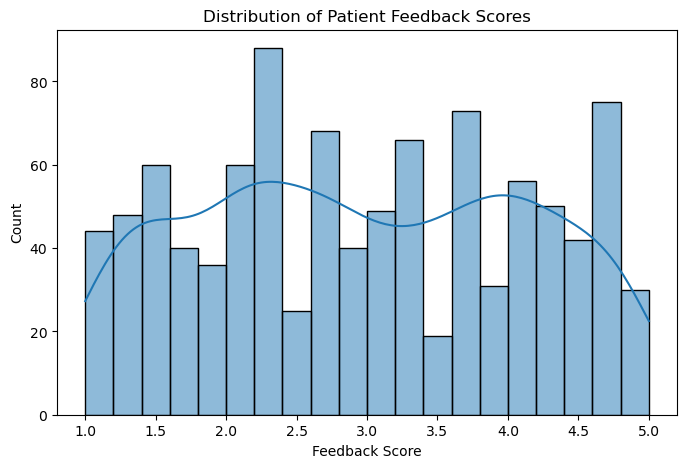

In [9]:
# Feedback distribution
plt.figure(figsize=(8,5))
sns.histplot(df['patient_feedback_score'], bins=20, kde=True)
plt.title("Distribution of Patient Feedback Scores")
plt.xlabel("Feedback Score")
plt.ylabel("Count")
plt.show()

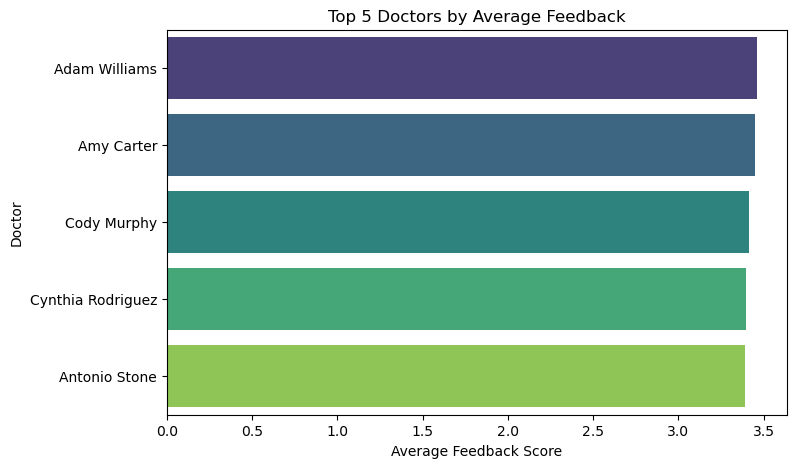

In [10]:
# Top 5 doctors bar plot
plt.figure(figsize=(8,5))
sns.barplot(data=top5, x='avg_feedback_score', y='doctor_name', palette='viridis')
plt.title("Top 5 Doctors by Average Feedback")
plt.xlabel("Average Feedback Score")
plt.ylabel("Doctor")
plt.show()
